Found 1153 images belonging to 2 classes.
Found 287 images belonging to 2 classes.
Epoch 1/30
73/73 [==============================] - 52s 682ms/step - loss: 0.8555 - accuracy: 0.5898 - val_loss: 0.6720 - val_accuracy: 0.5958
Epoch 2/30
73/73 [==============================] - 49s 668ms/step - loss: 0.6249 - accuracy: 0.6678 - val_loss: 0.6751 - val_accuracy: 0.5958
Epoch 3/30
73/73 [==============================] - 49s 670ms/step - loss: 0.5302 - accuracy: 0.7476 - val_loss: 0.6950 - val_accuracy: 0.5889
Epoch 4/30
73/73 [==============================] - 49s 666ms/step - loss: 0.3832 - accuracy: 0.8422 - val_loss: 0.8166 - val_accuracy: 0.5749
Epoch 5/30
73/73 [==============================] - 49s 673ms/step - loss: 0.2829 - accuracy: 0.8838 - val_loss: 0.9381 - val_accuracy: 0.5540
Epoch 6/30
73/73 [==============================] - 52s 713ms/step - loss: 0.1893 - accuracy: 0.9254 - val_loss: 1.0713 - val_accuracy: 0.5784
Epoch 7/30
73/73 [==============================] - 51s 703

C:\Users\KIIT\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


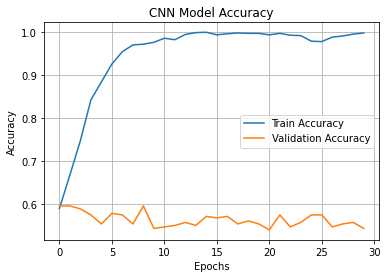

18/18 [==============================] - 2s 105ms/step
Accuracy: 0.5226
Precision: 0.6000
Recall (Sensitivity): 0.6105
F1 Score: 0.6052
AUC-ROC: 0.4974
Specificity: 0.3913
K-score: 0.5226


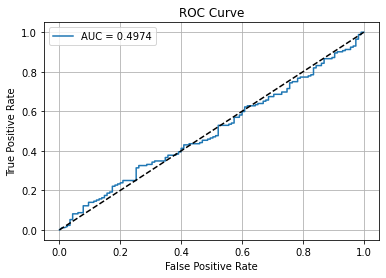

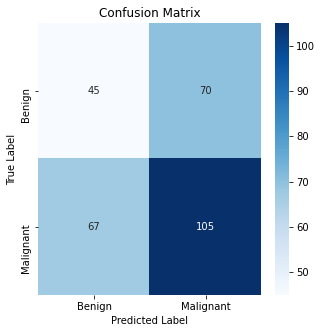

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Image Data Preprocessing
IMG_SIZE = (224, 224)
BATCH_SIZE = 16

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory('augmented_images', target_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                         class_mode='binary', subset='training')
val_data = datagen.flow_from_directory('augmented_images', target_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                       class_mode='binary', subset='validation')

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(train_data, validation_data=val_data, epochs=30)

# Save Model
model.save('cnn_model.h5')

# Plot Training & Validation Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Get Predictions
y_true = val_data.classes
y_pred_prob = model.predict(val_data)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Compute Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)  # Sensitivity
f1 = f1_score(y_true, y_pred)
auc_roc = roc_auc_score(y_true, y_pred_prob)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn + fp)
k_score = (tp + tn) / (tp + tn + fp + fn)  # Kappa Score approximation

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"K-score: {k_score:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
